In [215]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as seabornInstance
import matplotlib.pyplot as plt
import mpl_toolkits
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import normalize
#Importing#
data=pd.read_csv('house_data_complete.csv')
data.info()
head=data.head()#for visualizing
discribe=data.describe()#for visualizing
#classifying#
#x= len(data);


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


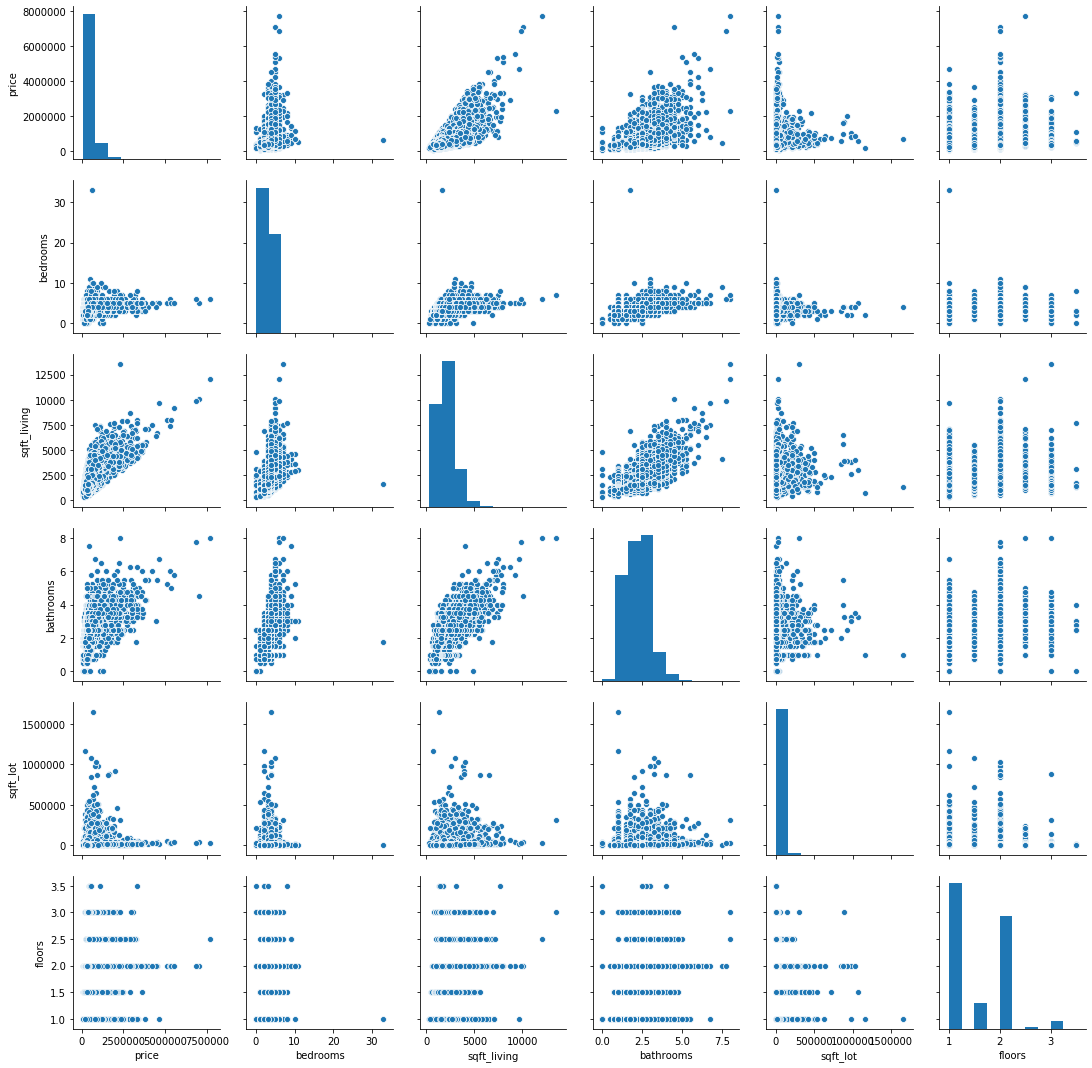

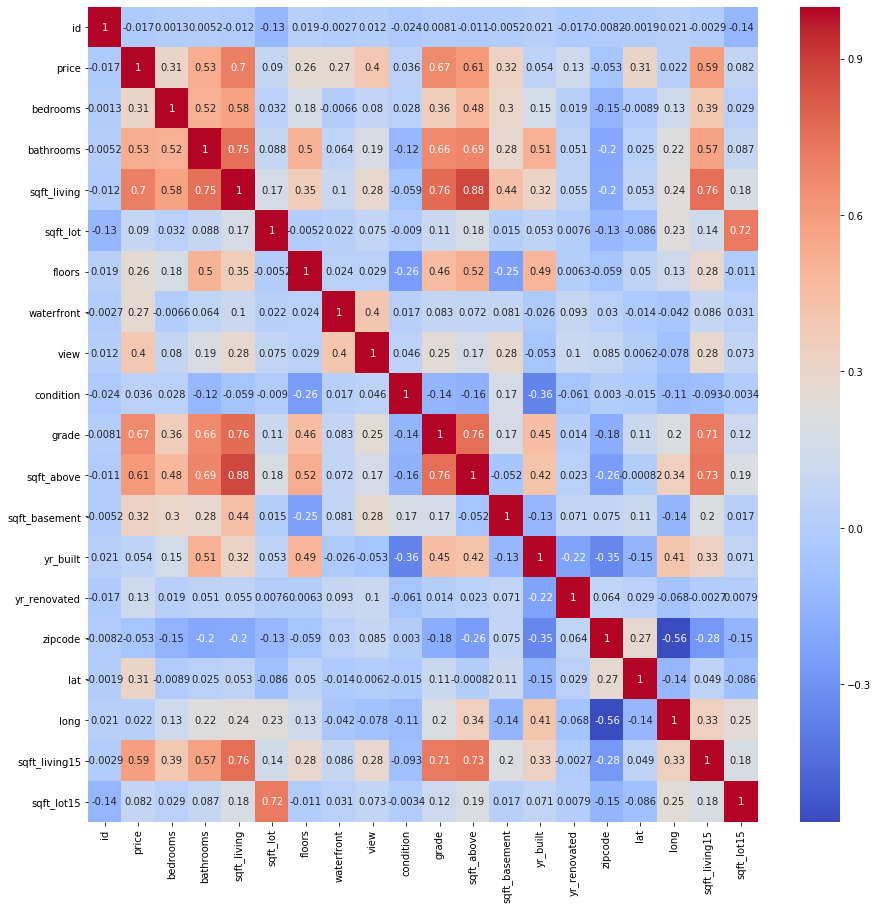

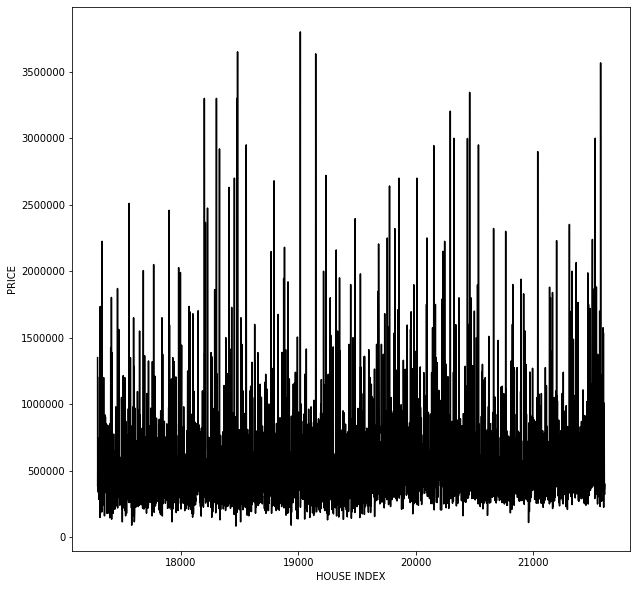

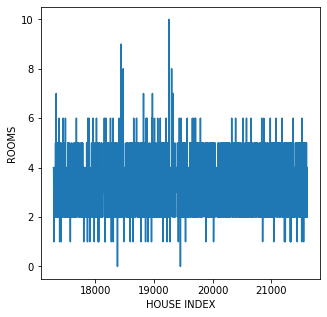

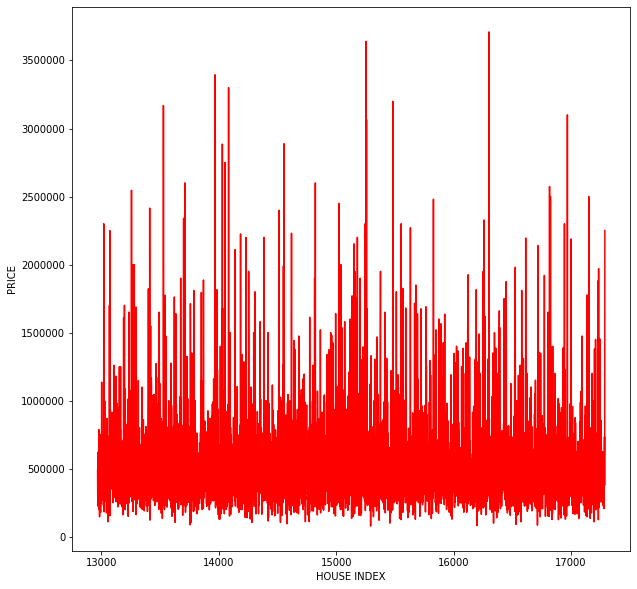

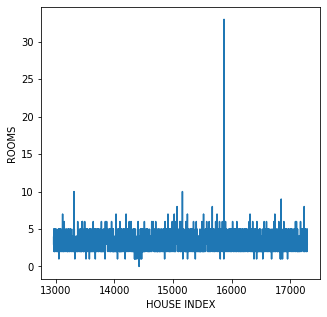

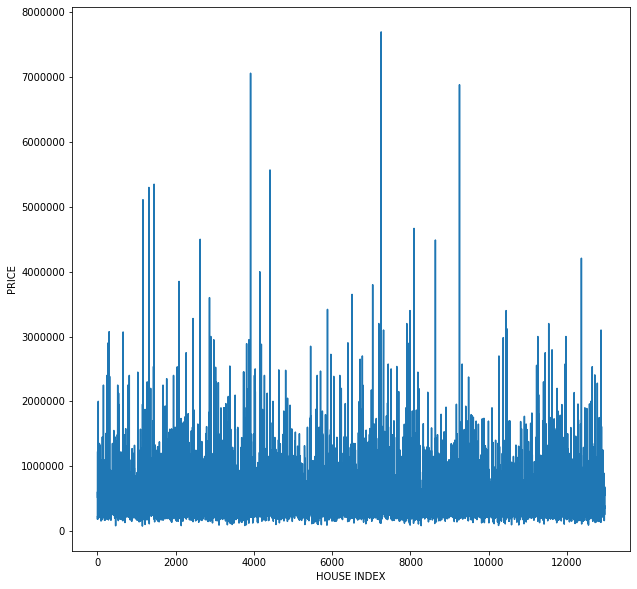

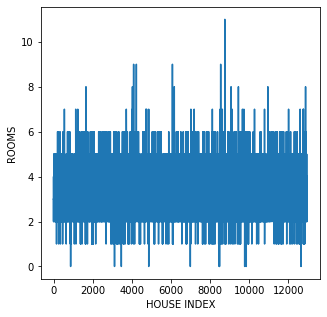

In [216]:
dftraining = data.iloc[0:12967] #60% of data for training
dfcrossvalidation = data.iloc[12967:17289] #20% of data on cross validation
dftesting = data.iloc[17289:21613] # 20% of data on testing
#cleaning data#
dftraining = dftraining.dropna()
dfcrossvalidation = dfcrossvalidation.dropna()
dftesting = dftesting.dropna()
#Plotting#
variables = [ 'price','date','bedrooms' , 'sqft_living','bathrooms', 'sqft_lot','floors']
sns.pairplot(data[variables]) 
plt.show()
#heat map
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.savefig('heatmap.png')
#plt.hist(dftraining.price,facecolor='red',bins=30)
#plt.show()
#plt.hist(dftesting.price,facecolor='blue',bins=30)
#plt.show()
#plt.hist(dfcrossvalidation.price,facecolor='grey',bins=30)
#plt.show()
plt.figure(figsize=(10,10))
plt.plot(dftesting.price,'k')
plt.xlabel("HOUSE INDEX")
plt.ylabel("PRICE")
plt.figure(figsize=(5,5))
plt.plot(dftesting.bedrooms)
plt.xlabel("HOUSE INDEX")
plt.ylabel("ROOMS")
plt.figure(figsize=(10,10))
plt.plot(dfcrossvalidation.price,'r')
plt.xlabel("HOUSE INDEX")
plt.ylabel("PRICE")
plt.figure(figsize=(5,5))
plt.plot(dfcrossvalidation.bedrooms)
plt.xlabel("HOUSE INDEX")
plt.ylabel("ROOMS")
plt.figure(figsize=(10,10))
plt.plot(dftraining.price)
plt.xlabel("HOUSE INDEX")
plt.ylabel("PRICE")
plt.figure(figsize=(5,5))
plt.plot(dftraining.bedrooms)
plt.xlabel("HOUSE INDEX")
plt.ylabel("ROOMS")
plt.show()

In [210]:
X=dftraining[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view','condition']]
y=dftraining['price']

In [144]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X);
    sigma = np.std(X);
    X_norm =(X-mu)/sigma;
   
    # ================================================================
    return X_norm, mu, sigma


In [5]:
X_norm, mu, sigma = featureNormalize(X)

In [6]:
m = y.size
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [211]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (n+1, ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. 
    You should set J to the cost.
    """
    
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly

    
    J = 0
    
    # ====================== YOUR CODE HERE =====================
    h=X.dot(theta)
    
    J=1/(2*m)*np.sum(np.square(h-y))
    
    # ===========================================================
    return J

In [104]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : arra_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        alphabym=alpha/m
        sumofh0x=np.dot(X,theta)
        theta=theta-((alpha/m)*(np.dot(X.T,sumofh0x-y)))

        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history


In [36]:
#hypothesis 1
# initialize fitting parameters
theta = np.zeros([8])
# some gradient descent settings
iterations = 2000
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))

Theta found by gradient descent: 531605.4468, -50546.1605


In [37]:
def plotData(x, y):
    """
    Plots the data points x and y into a new figure. Plots the data 
    points and gives the figure axes labels of population and profit.
    
    Parameters
    ----------
    x : array_like
        Data point values for x-axis.

    y : array_like
        Data point values for y-axis. Note x and y should have the same size.
    
    Instructions
    ------------
    Plot the training data into a figure using the "figure" and "plot"
    functions. Set the axes labels using the "xlabel" and "ylabel" functions.
    Assume the population and revenue data have been passed in as the x
    and y arguments of this function.    
    
    Hint
    ----
    You can use the 'ro' option with plot to have the markers
    appear as red circles. Furthermore, you can make the markers larger by
    using plot(..., 'ro', ms=10), where `ms` refers to marker size. You 
    can also set the marker edge color using the `mec` property.
    """
    fig = pyplot.figure()  # open a new figure
    
    #MEC stands for Mark Edge Color to define the Color of the broder of the data point for easy visibility     
    # ====================== YOUR CODE HERE ======================= 
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Price')
    pyplot.xlabel('Factors')
    # =============================================================

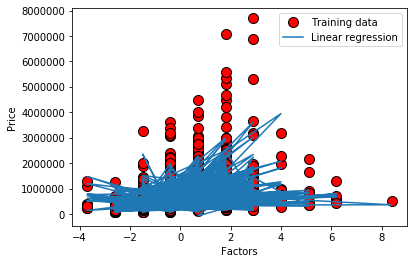

In [38]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Training data', 'Linear regression']);

theta computed from gradient descent: [531605.44683832 -50546.16047322   3911.88880472 263637.92741765
 -16393.13376541  10032.2063551   72493.93234472  29619.40848346]


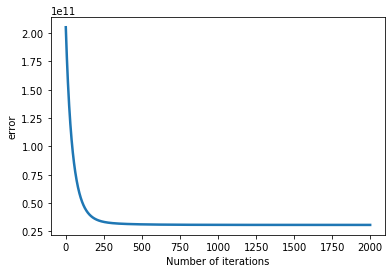

In [41]:

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2.5)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('error')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

In [51]:
#sqyaring the second column in the normalized datA
print(X[:,2])
X[:,2] = X[:,2]*X[:,2];
print(X[:,2])

[-1.39485604  0.24811125 -1.39485604 ... -0.40907567 -1.39485604
 -0.73766913]
[1.94562337 0.06155919 1.94562337 ... 0.1673429  1.94562337 0.54415574]


In [52]:
#hypothesis 2
# initialize fitting parameters
theta = np.zeros([8])
# some gradient descent settings
iterations = 2000
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))


Theta found by gradient descent: 497450.1482, -43799.5124


theta computed from gradient descent: [497450.14824777 -43799.51241075  34133.76654409 239146.14138369
 -16066.62364036  15221.8579998   68240.35662532  32236.46028232]


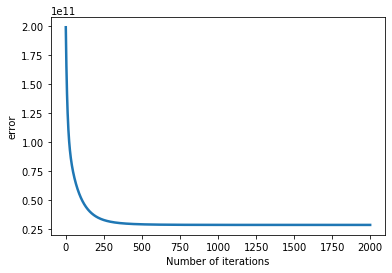

In [53]:
pyplot.plot(np.arange(len(J_history)), J_history, lw=2.5)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('error')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

In [55]:
#sqyaring the 3rd column in the normalized datA
print(X[:,3])
X[:,3] = X[:,3]*X[:,3];
print(X[:,3])

[-0.95818643  0.57113484 -1.40928119 ...  0.26307012 -0.91417718
  0.76917644]
[0.91812123 0.32619501 1.98607347 ... 0.06920589 0.83571992 0.5916324 ]


In [56]:
#hypothesis 3
# initialize fitting parameters
theta = np.zeros([8])
# some gradient descent settings
iterations = 2000
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))


Theta found by gradient descent: 474275.6973, 62272.3251


theta computed from gradient descent: [474275.69729659  62272.3251467    2316.81159793  55012.69457787
   2857.1934003   69218.36343985  99020.64711216  31532.63827288]


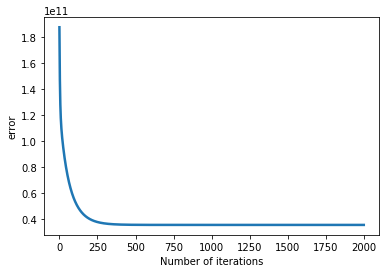

In [57]:
pyplot.plot(np.arange(len(J_history)), J_history, lw=2.5)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('error')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

In [196]:
import numpy as np
from sklearn.model_selection import KFold
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np



In [197]:
dataset = pd.read_csv('house_data_complete.csv')
data=dataset.dropna()
X=data[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view','condition']]
y=data['price']
X= pd.DataFrame(data=X)
kf=KFold(n_splits=5,shuffle=True , random_state=2)
result=next(kf.split(X),None)
print(result)
train=X.iloc[result[0]]
test=X.iloc[result[1]]
print(train)
print(test)
y1=y[0:int(len(y)*0.8)]
theta= np.zeros([8])
m= y1.size
#X_norm=X_norm[0:int(len(X_norm)*0.8)]
train=train.dropna()
#train=featureNormalize(train)
train, mu, sigma = featureNormalize(train)
train = np.concatenate([np.ones((m, 1)), train], axis=1)
#y=y[0:int(len(y)*0.8)]
# some gradient descent settings
iterations = 1500
alpha = 0.01
theta, J_history = gradientDescent(train ,y1, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
#X= pd.DataFrame(data=X)
#kf=KFold(n_splits=5,shuffle=True , random_state=2)
#result=next(kf.split(X),None)
#print(result)
#train=X.iloc[result[0]]
#test=X.iloc[result[1]]
#print(train)
#print(test)
#m = y.size
#len(train)
#train_norm=featureNormalize(train)
#train = np.concatenate([np.ones((m, 1)), train_norm], axis=1)

(array([    0,     1,     2, ..., 21610, 21611, 21612]), array([    4,     8,    10, ..., 21565, 21568, 21589]))
       bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  condition
0             3       1.00         1180      5650     1.0     0          3
1             3       2.25         2570      7242     2.0     0          3
2             2       1.00          770     10000     1.0     0          3
3             4       3.00         1960      5000     1.0     0          5
5             4       4.50         5420    101930     1.0     0          3
6             3       2.25         1715      6819     2.0     0          3
7             3       1.50         1060      9711     1.0     0          3
9             3       2.50         1890      6560     2.0     0          3
11            2       1.00         1160      6000     1.0     0          4
12            3       1.00         1430     19901     1.5     0          4
13            3       1.75         1370      9680     1.0     

theta computed from gradient descent: [533247.34214777  -4356.60297409   -923.86450467  -1660.95184801
   2527.18268438    939.86920897  -3923.57940779   4250.26706595]


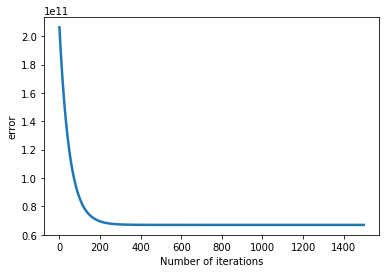

In [198]:
#train GD
pyplot.plot(np.arange(len(J_history)), J_history, lw=2.5)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('error')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

Theta found by gradient descent: 538715.4660, 5502.2011
theta computed from gradient descent: [538715.46599755   5502.20108461   7481.71879673   2393.6241509
  -5798.58821668 -14026.46984539  15352.49447816  -5953.70200424]


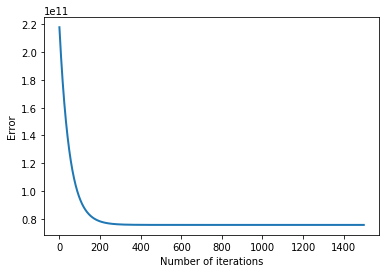

In [199]:
#Test GD
y2=y[0:int(len(y)*0.2)]
theta= np.zeros([8])
m= y2.size
test=test.dropna()
test, mu, sigma = featureNormalize(test)
test= test[:-1]
test = np.concatenate([np.ones((m, 1)), test], axis=1)
# some gradient descent settings
iterations = 1500
alpha = 0.01
theta, J_history = gradientDescent(test ,y2, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Error')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

In [205]:
#Testing k fold
theta=[531605.44683832, -50546.16047322  , 3911.88880472 ,263637.92741765
 -16393.13376541  ,10032.2063551  , 72493.93234472  ,29619.40848346]
X_test=dftesting[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view','condition']]
y_test=dftesting['price']
computeCost(X_test, y_test, theta)

5.546126292812668e+19

In [218]:
#Testing h1 fold
theta=[531605.44683832, -50546.16047322,   3911.88880472, 263637.92741765,
 -16393.13376541,  10032.2063551,   72493.93234472]
X_test=dftesting[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view','condition']]
y_test=dftesting['price']
computeCost(X_test, y_test, theta)

6.305726440315277e+19

In [220]:
#Testing h2 fold
theta=[497450.14824777, -43799.51241075,  34133.76654409, 239146.14138369,
 -16066.62364036,  15221.8579998,   68240.35662532]
X_test=dftesting[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view','condition']]
y_test=dftesting['price']
computeCost(X_test, y_test, theta)

5.213617739256486e+19

In [221]:
#Testing h3 fold
theta=[474275.69729659,  62272.3251467,    2316.81159793,  55012.69457787,
   2857.1934003,   69218.36343985,  99020.64711216]
X_test=dftesting[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view','condition']]
y_test=dftesting['price']
computeCost(X_test, y_test, theta)

2.749320625261766e+18